This notebook makes use of Meta (aka Facebook) Prophet AutoML to forecast time series.

In [1]:
import pandas as pd
import os

PATH_CSV = '/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast'

df_sales = pd.read_csv(os.path.join(PATH_CSV,"sales_train.csv"))
df_items = pd.read_csv(os.path.join(PATH_CSV,"items.csv"))
df_resturant = pd.read_csv(os.path.join(PATH_CSV,"resturants.csv"))

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce') 

Begin by producing a line graph of all sales over the provided 3-year timespan. We will use this to train Prophet.

In [2]:
import plotly.express as px

df_plot = df_sales[['date','item_count']].groupby(['date']).sum().reset_index()
fig = px.line(df_plot, x="date", y="item_count", title='Total Sales by Date')
fig.show()

Construct prophet and put the previous data into the form expected by prophet.

In [3]:
import pandas as pd
from prophet import Prophet

df_plot.columns = ['ds','y']

m = Prophet()
m.fit(df_plot)

23:21:28 - cmdstanpy - INFO - Chain [1] start processing
23:21:28 - cmdstanpy - INFO - Chain [1] done processing


Predict one year into the future.

In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1456,2022-12-27
1457,2022-12-28
1458,2022-12-29
1459,2022-12-30
1460,2022-12-31


Display the predicted tabular data.

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2022-12-27,374.212523,318.073687,435.511113
1457,2022-12-28,431.269435,376.851593,493.427407
1458,2022-12-29,614.409794,556.986847,674.952598
1459,2022-12-30,738.281529,672.843598,798.721250
1460,2022-12-31,739.296911,679.002839,798.714072


Plot the future predictions.

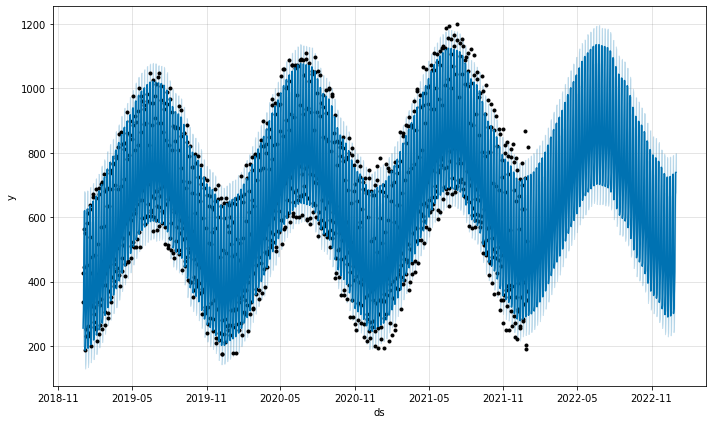

In [6]:
fig1 = m.plot(forecast)

See what seasonality and trend were detected.

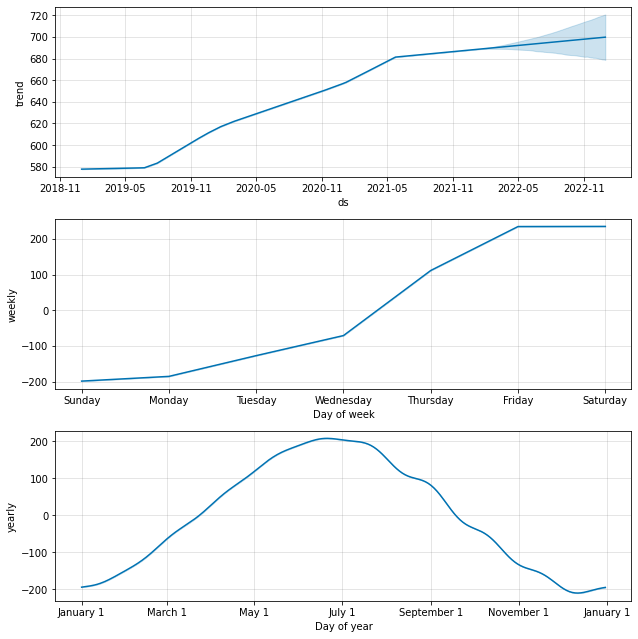

In [7]:
fig2 = m.plot_components(forecast)

Use Plotly to generate an interactive plot.

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)